<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Clustering

_Instructor:_ Sinan Uozdemir (San Francisco), Alex Sherman (DC), Steven Longstreet (DC)

---

<a id="learning-objectives"></a>
### Learning Objectives
- Know the difference between supervised and unsupervised learning.
- Understand and know how to apply k-means clustering.
- Understand and know how to apply density-based clustering (DBSCAN).
- Define the Silhouette Coefficient and how it relates to clustering.

### Lesson Guide
- [Unsupervised Learning](#unsupervised-learning)
	- [Unsupervised Learning Example: Coin Clustering](#unsupervised-learning-example-coin-clustering)
	- [Common Types of Unsupervised Learning](#common-types-of-unsupervised-learning)
	- [Using Multiple Types of Learning Together](#using-multiple-types-of-learning-together)
- [Clustering](#clustering)
- [K-Means: Centroid Clustering](#k-means-centroid-clustering)
	- [Visual Demo](#visual-demo)
	- [K-Means Assumptions](#assumptions-are-important-k-means-assumes)
- [K-Means Demo](#k-means-demo)
	- [K-Means Clustering](#k-means-clustering)
	- [Repeat With Scaled Data](#repeat-with-scaled-data)
- [DBSCAN: Density-Based Clustering](#dbscan-density-based-clustering)
	- [Visual Demo](#visual-demo)
- [DBSCAN Clustering Demo](#dbscan-clustering-demo)
- [Hierarchical Clustering](#hierarchical-clustering)
- [Clustering Metrics](#clustering-metrics)
- [Clustering, Classification, and Regression](#clustering-classification-and-regression)
- [Comparing Clustering Algorithms](#comparing-clustering-algorithms)
- [Lesson Summary](#lesson-summary)

<a id="unsupervised-learning"></a>
## Unsupervised Learning
---

Supervised learning focuses on finding a relationship between a matrix of features and a response variable. 

There is typically additional (latent) structure hiding in the feature matrix. For example, some features might be related to each other or even redundant. There also could be groups of observations that seem to be related.

Taking advantage of these latent structures allows us to study data without an explicit response in mind and to find better representations for our data to improve predictive performance.

**Unsupervised learning** is designed to identify these kinds of structural relationships in our data.

> **The primary goal of unsupervised learning is "representation."** Unsupervised learning extracts structure from data. For example, you could segment grocery-store shoppers into "clusters" of shoppers who exhibit similar behaviors.

So far, we have primarily studied supervised algorithms: Each observation (row of data) comes with one or more labels -- either categorical variables (classes) or measurements (regression).

Unsupervised learning has a different goal: feature discovery.

> One common and fundamental example of unsupervised learning is **clustering**. Clustering algorithms are used to find meaningful groups within data.

Another type of unsupervised learning is **dimensionality reduction**, the most popular type of this (principal components), we will cover in a minitopic.

**Unsupervised learning is clearly differentiated from supervised learning.** With unsupervised learning:

- There's no clear objective.
- There's no "right answer" (which means it's hard to tell how well you're doing).
- There's no response variable — only observations with features.
- Labeled data is not required.

<a id="unsupervised-learning-example-coin-clustering"></a>
### An Example of Unsupervised Learning: Coin Clustering

- Observations: Coins
- Features: Size and mass
- Response: None (no hand-labeling required!)

- Perform unsupervised learning:
  - Cluster the coins based on “similarity.”
  - You’re done!

![](./assets/unsupervised-coin.png)

What would you imagine a plot of US coins to look like? Are these coins likely US coins (pennies, nickels, dimes, and quarters)?

**Answer:** ---

What conclusions could you make about this group of coins?

**Answer:** ---

<a id="common-types-of-unsupervised-learning"></a>
### Common Types of Unsupervised Learning

**Clustering:** Group “similar” data points together.

**Dimensionality Reduction:** Reduce the dimensionality of a data set by extracting features that capture most of the variance in the data. (Again, more on this in a future lesson).

<a id="clustering"></a>
## Clustering
---

We're going to cover three major clustering approaches:

- **Centroid clustering using k-means:** Looks for the centers of k pre-specified groups.

- **Density-based clustering using DBSCAN:** Looks at gaps, or lack thereof, between datapoints.

- **Hierarchical clustering using agglomerative clustering:** Forms groups of groups of groups in a hierarchy to determine clusters.


Additional Clustering approaches available in  [scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)
 - [Great guide comparing performance against HBSCAN with guided applications](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html)

#### K-Means Clustering

Similarly to k-nearest neighbors, this partitions the entire space into regions (Voronoi partitions). In k-means clustering, k refers to the number of clusters. Also, since this is unsupervised learning, the regions are determined by the k-means algorithm instead of being provided by the training data.

**Question:** Why might data often appear in centered clusters?

![](./assets/images/clustering-centroids.png)

#### Density-Based Clustering

In DBSCAN (Density-Based Spatial Clustering of Applications with Noise), clusters are created from areas of high density. This can lead to irregularly shaped regions. Also, many parts of space may not belong to any region.

**Question:** Why might data often appear in density-based clusters?

<p align="center">
<img src="./assets/density-clusters.png" width="500">
</p>

#### Hierarchical Clustering

In hierarchical clustering, clusters are composed by joining two smaller clusters together.

Below, we see a tree data structure that stores clusters of points:
- Each node represents a cluster of one or more data points.
- Each leaf represents a single data point.
- The root is the cluster containing all data points.
- Each parent combines its children's clusters to create a new (larger) cluster.

**Question:** When might hierarchical clustering be useful?

<p align="center">
<img src="./assets/hierarchical-clustering.png" width="500">
</p>

<a id="k-means-centroid-clustering"></a>
## K-Means: Centroid Clustering
---

K-means clustering is a popular centroid-based clustering algorithm.
 
In k-means clustering, we find $k$ clusters (where $k$ is user-specified), each distributed around a single point (called a **centroid**, an imaginary "center point" or the cluster's "center of mass").

> **K-means seeks to minimize the sum of squares of each point about its cluster centroid.**

If we manage to minimize this, then we claim to have found good clusters.

---

#### Step Two: Error of one cluster

We need to measure the "tightness" of each cluster -- the closer its points are to the centroid, the better. So, we'll measure how far away each point is from the centroid. Further, we'll square each distance to particularly penalize far away points.

So, the sum of the distances of each point $x$ to $\mu$ is just:

$$E_i(S) = {\sum_{x \in S} {\|x - \mu\|^2}}$$

> This is read: "The sum of the square distances of each point in S to the centroid of S."

**Question:** How does this relate to the goal statement?

**Answer:** ---

#### Step Three: Sum of all cluster errors

Now, let's find this sum for each cluster. If we sum these sums together, that is the total error for all $k$ clusters:

$$E_{total}(S_1, ..., S_k) = \sum_{i=1}^k E_i(S_i)$$

$$= \sum_{i=1}^k {\sum_{x \in S} {\|x - \mu\|^2}}$$

**Question:** How does this relate to the goal statement?

**Answer:** ---

#### Step Four: Find the clusters that minimize total error

Precisely, find $k$ partitions $S_1, …, S_k$ of the data with centroids $\mu_1, …, \mu_k$ that minimize $E_{total}$. In other words:

$$\text{argmin}_{S_1, …, S_k} \sum_{i=1}^k {\sum_{x \in S_i} {\|x - \mu_i\|^2}}$$

> $\text{argmin}_{S_1, …, S_k}\ f(S_1, ..., S_k)$: Find the values of $S_1, ..., S_k$ that minimize $f(S_1, ..., S_k)$.

## K-Means: Under the hood
This is a computationally difficult problem to solve, so we often rely on heuristics.

The "standard" heuristic is called **Lloyd’s Algorithm**:
1. Start with $k$ initial (random) points* (we'll call these "centroids").
2. Assign each datapoint to a cluster by finding its "closest" centroid (e.g. using Euclidean distance).
3. Calculate new centroids based on the datapoints assigned to each cluster.
4. Repeat 2-4 until clusters do not change.

\* There are a number of techniques for choosing initial points. For example, see the `k-means++` technique.

<a id="visual-demo"></a>
### Visual Demo

[Click through](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) for a demo of k-means clustering in action.

<p align="center">
<img src="./assets/voronoi.png" width="500">
</p>

<a id="assumptions-are-important-k-means-assumes"></a>
### K-Means Assumptions

K-means assumes:

- k is the correct number of clusters.
- The data is isotropically distributed (circular/spherical distribution).
- The variance is the same for each variable.
- Clusters are roughly the same size.

View these resources to see counterexamples/cases where assumptions are not met:
- [Variance Explained](http://varianceexplained.org/r/kmeans-free-lunch/)
- [Scikit-Learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html)

#### How do we choose k?

Finding the correct k to use for k-means clustering is not a simple task.

We do not have a ground-truth we can use, so there isn't necessarily a "correct" number of clusters. However, we can find metrics that try to quantify the quality of our groupings.

Our application is also an important consideration. For example, during customer segmentation we want clusters that are large enough to be targetable by the marketing team. In that case, even if the most natural-looking clusters are small, we may try to group several of them together so that it makes financial sense to target those groups.

**Common approaches include:**
- Figuring out the correct number of clusters from previous experience.
- Using the elbow method to find a number of clusters that no longer seems to improve a clustering metric by a noticeable degree.
  - The silhouette coefficient is a commonly used measure but others can be used to approximate the same.
  - For an example, check out this [silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) documentation on sklearn.
  - If we're using clustering to improve performance on a supervised learning problem, then we can use our usual methods to test predictions.
  
**It's tempting to "tune" k as we have in supervised learning:**
  - If we are working on a supervised learning problem, then this is possible.
  - If we are using clustering to explore our data, then tuning is of little benefit since we do not know precisely what we are looking for.

<a id="k-means-demo"></a>
## K-Means Demo
---

In [1]:
# imports
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [2]:
# Beer data set
url = './data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


#### How would you cluster these beers?

In [3]:
# Define X.
X = beer.drop('name', axis=1)

**Question:** What happened to Y?

<a id="k-means-clustering"></a>
### K-Means Clustering
#### K-means with three clusters
First, we will perform clustering <i>without</i> scaled data. In the next section below, we will scale the data to compare the differences.

In [4]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

#### Review the cluster labels.

In [5]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

#### Save the cluster labels and sort by cluster.

In [6]:
beer['cluster'] = km.labels_
beer.sort_values('cluster').head()

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0


In [7]:
beer.sort_values('cluster').tail()

,name,calories,sodium,alcohol,cost,cluster
8,Miller_Lite,99,10,4.3,0.43,1
11,Coors_Light,102,15,4.1,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1
15,Pabst_Extra_Light,68,15,2.3,0.38,2
18,Olympia_Goled_Light,72,6,2.9,0.46,2


###### What do the clusters seem to be based on? Why?

#### Review the cluster centers.

In [8]:
km.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [102.75      ,  10.        ,   4.075     ,   0.44      ],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

#### Calculate the mean of each feature for each cluster.

In [9]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


#### Save the `DataFrame` of cluster centers.

In [10]:
centers = beer.groupby('cluster').mean()

#### Create a "colors" array for plotting.

In [11]:
colors = np.array(['red', 'green', 'blue', 'yellow'])

#### Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue).

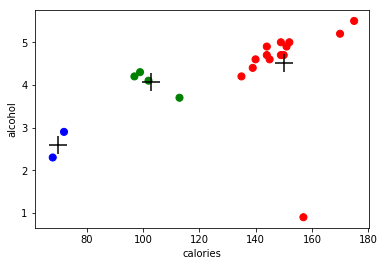

In [14]:
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('calories')
plt.ylabel('alcohol')
plt.show();

#### Scatter plot matrix (0=red, 1=green, 2=blue).

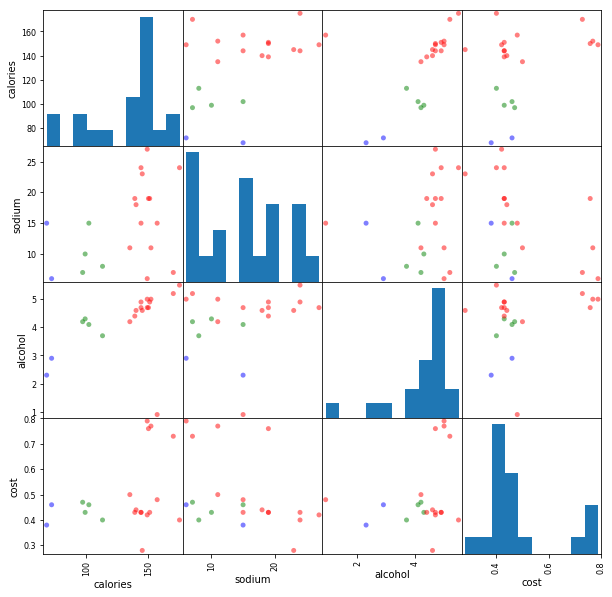

In [15]:
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

<a id="repeat-with-scaled-data"></a>
### Repeat With Scaled Data

Unscaled features cause most algorithms to put too much weight onto one feature. We can scale our data to make sure k-means accounts for all features.

Remember that k-means is looking for isotropic groups, meaning that they disperse from the center in all directions evenly. 

There is more than one choice of scaling method (min/max, z-score, log, etc.), but the best choice is the one that makes your clusters isotropic.

#### Center and scale the data.

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\touka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\touka\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### K-means with three clusters on scaled data.

In [17]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

#### Save the cluster labels and sort by cluster.

In [18]:
beer['cluster'] = km.labels_
beer.sort_values('cluster').head()

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0


#### What are the "characteristics" of each cluster?

#### Review the cluster centers.

In [19]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


#### Scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue).

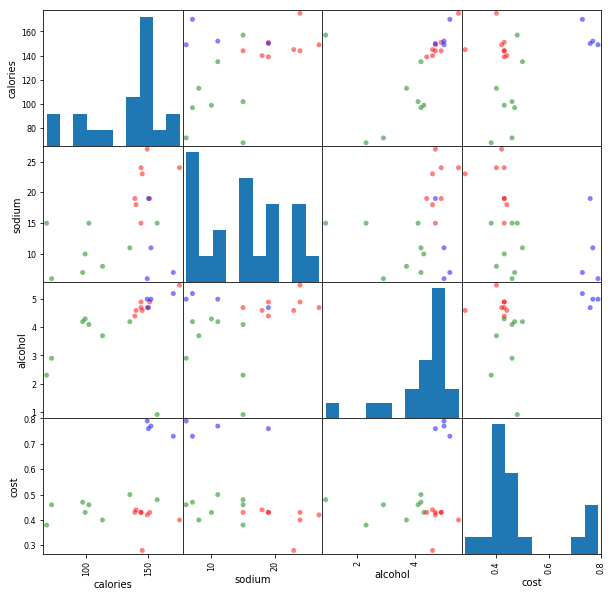

In [20]:
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

### Exercise

Use the `make_blobs()` method to generate a dataset to work with.  

Create a dataset with the following specifications:

* Number of samples should be `600`
* Each sample should contain `2` features.
* The dataset should have `6` centers.
* The Standard Deviation should be `0.8` for each cluster.

Note the keyword arguments for the function were not provided in the specification above.  You'll either need to inspect `make_blobs()` using a `?`, or go to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to figure out what keywords correspond to each of the parameters specified above.  



In [22]:
## use make_blobs
X_blob, y_blob =  make_blobs(n_samples=600, n_features=2, centers=6, cluster_std=0.8,  random_state = 42324)

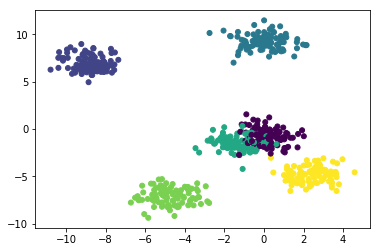

In [23]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, s = 25);

The scatter plot above shows the clusters produced by the ```make_blobs()``` method. Now you can use the k means clustering algorithm to identify these clusters the dataset.

In the cell below:

* Create a `KMeans` object and set `n_clusters` to `6`.
* `fit()` the model to the data stored in `X_blob`.
* Generate cluster predictions with `k_means` and store the results in `y_blob_hat`.

Look at the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) if you need to check the various options for the ```KMeans()``` method.  

In [35]:
# Your code here - use km as a variable name for your model and y_blob_hat for your predictions
km = KMeans(n_clusters=6,random_state=21)
km.fit(X_blob)
y_blob_hat = km.predict(X_blob)

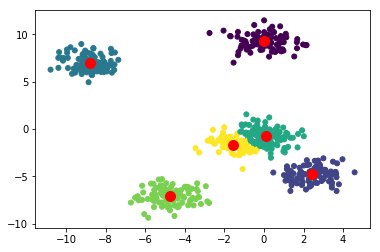

In [36]:
#Plot the centroids
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob_hat, s = 25)
cl_centers = km.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='red', s=100);

### Applying the elbow method to k-means

The [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) is one possible method to help narrow in on the ideal value of **K**. The method is built around the concept of diminishing returns where the percentage of explained variance is reviewed as a function of the number of clusters: One should choose a number of clusters where the next cluster doesn't significantly explain additional variance. 

[Determining the right number of clusters](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

In [ ]:
# k means determine k

# Hey look! A new package. Cdist computes distance between each pair of the two collections of inputs.
# We're going to use it to compute the distance between each observation and the cluster center

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Let's analyze the above

- Do you see the **"elbow"**?

- What's the best value of k?



In [ ]:
# We can make this a little easier by using the .interia() method available in KMeans

distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)


plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<a id="dbscan-density-based-clustering"></a>
## DBSCAN: Density-Based Clustering
---

<p align="center">
<img src="./assets/dbscan.png" width="500">
</p>

**DBSCAN: Density-Based Spatial Clustering of Applications With Noise (1996)**

The main idea of DBSCAN is to group together closely packed points by identifying:
- Core points
- Reachable points
- Outliers (not reachable)

**Its two parameters are:**
- `min_samples`: At least this many points are required inside a neighborhood to form a dense cluster.
- `eps`: epsion. This is the radius of a neighborhood.

**How does it work?** 

1. Choose a random unvisited data point.
2. Find all points in its neighborhood (i.e. at most `eps` units away). Then:
    - **If there are at least `min_samples` points in its neighborhood:** Add all points in the neighborhood to the current cluster. Mark them as unvisited if they have not been visited.
    - **Otherwise:** Mark the current point as visited. If the point is not part of a cluster, label the point as noise and go to Step 1.
3. If another point in the current cluster is unvisited, choose another point in the cluster and go to Step 2. Otherwise, start a new cluster and go to Step 1.

As a class, try running the algorithm on the board.

<a id="visual-demo"></a>
### Visual Demo

[Click through](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) for a demo of DBSCAN in action.

**DBSCAN advantages**:
- Can find arbitrarily shaped clusters.
- Don’t have to specify number of clusters.
- Excludes outliers automatically.

**DBSCAN disadvantages**:
- Doesn’t work well when clusters are of varying densities.
- Hard to choose parameters that work for all clusters.
- Can be hard to choose correct parameters.

#### How does DBSCAN differ from k-means?

<a id="dbscan-clustering-demo"></a>
## DBSCAN Clustering Demo
---

#### DBSCAN with eps=1 and min_samples=3.

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

#### Review the cluster labels.

In [ ]:
db.labels_

#### Save the cluster labels and sort by cluster.

In [ ]:
beer['cluster'] = db.labels_
beer.sort_values('cluster').head()

#### Review the cluster centers.

In [ ]:
beer.groupby('cluster').mean()

#### Scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow).

In [ ]:
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

#### Optimizing eps and min_sample

Finding the right paramaters with DBScan is dependent on understanding what you **WANT** to find. It's best solved for with domain knowledge and **NOT** mathematics. There is no general way of choosing min_samples but there are some points to take into consideration.
- A low min_sample means it will build more clusters from noise so a small value 
- A large value could exclude the formation of ANY clusters

For epsilon, there are various aspects. The recommended approach is to first select a min_sample based on domain knowledge. Approaches might be
   - You can try to do a [knn distance histogram](http://www.jatit.org/volumes/Vol92No2/21Vol92No2.pdf) and choose a "knee" there, but there might be no visible one, or multiple.
   - Plot a k-distance graph (with k=min_samples) and look for an elbow in this graph. 
   - Apply domain knowledge to choose epsilon. For instance with geo-spacial data you might know that 10m is a suitable radius. You can then perform a density plot for this radius and look for an elbow there.
   - Utlize a package like [**HDBSCAN**](https://hdbscan.readthedocs.io/en/latest/index.html) or [**Optics**](https://en.wikipedia.org/wiki/OPTICS_algorithm) which are DBSCAN variation without an epsilon parameter. The packages take seperate ways of delivering a hierarchical output that can roughly be seen as "running DBSCAN with every possible epsilon".



[Good read on suggested approaches to optimizing DBSCAN (eps and min_sample)](http://www.sersc.org/journals/IJSIP/vol6_no1/9.pdf)

<a id="hierarchical-clustering"></a>
## Hierarchical Clustering
---

Hierarchical clustering, like k-means clustering, is another common form of clustering analysis. With this type of clustering we seek to do exactly what the name suggests:

- Build hierarchies of clusters.
- Connect the clusters in the hierarchy with links.

Once the links are determined, we can display them in what is called a dendrogram — a graph that displays all of these links in their hierarchical structure.

**As we described earlier:**

- Each node represents a cluster of one or more data points.
- Each leaf represents a single data point.
- The root is the cluster containing all data points.
- Each parent combines its children's clusters to create a new (larger) cluster.

**A simple algorithm we could use to generate this tree:**

1. Create a cluster for each point, containing only that point. (Create all leaf nodes.)
2. Choose the two clusters with centroids closest to each other.
    - Combine the two clusters into a new cluster that replaces the two individual clusters. (Create a new parent node.)
3. Repeat Step 2 until only one cluster remains.

Essentially we form groups of groups of groups.

<p align="center">
<img src="./assets/hierarchical-clustering.png" width="500">
</p>

#### Understanding Hierarchical Clusters


THe goal of agglomerative clustering is to groups similar objects into groups called clusters. We group them based on distance which tends to be euclidean but [other distances](https://en.wikipedia.org/wiki/Distance) can/should be used depending on the problem. The output of the process is a set of clusters, where each cluster is distinct from each other cluster while the objects within each cluster are broadly similar to each other.

Let's look at it from a high level - it's a two step process


<p align="center">
<img src="./assets/Hierarchical-clustering-4.png" width="500">
</p>
We can break this down visually as we go through the process on an example set of data

<p align="center">
<img src="./assets/Hierarchical-clustering-2.png" width="500">
</p>

The output of clustering is a **dendrogram** depicting the hierarchical relationship between the clusters:

<p align="center">
<img src="./assets/Hierarchical-clustering-3.png" width="500">
</p>

#### **Knowledge check**

>1. What letters are most similar to **F**?
>2. Which letters are the least similar to **F**?


Ok... so what does agglomerative clustering mean?

In agglomerative hierarchical clustering the alogorithm works by sequentially merging similar clusters as we saw above. Inversely, Divisive clustering works the other way by starting with one grouping then successively splitting these clusters. In practice - Divisive clustering is rarely used. 

**Any thoughts on why?**



[source](https://www.displayr.com/what-is-hierarchical-clustering/)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_scaled)
labels = agg.labels_

In [ ]:
# Save the cluster labels and sort by cluster.
beer['cluster'] = agg.labels_
beer.groupby('cluster').mean()

In [ ]:
# Scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

<a id="clustering-metrics"></a>
## Clustering Metrics
---

### Understanding cluster evaluation

Evaluating a cluster, and many other unsupervised models, is not as trivial as calling a `.score ` method like a Supervisoed model. Unsupervised models are often evaluated by the how the model gets used or consumed by downstream methods - typically other models. Essentially how well a model performs will largely depend on why one is doing unsupervised learning in the first place. What was the context of your end goal for using clustering?

- Did the cluster improve accuracy in classification model? 
    - Improve your true positive rate? 
    - Improve recall?
    - etc...
    
    
- Did the cluster reduce error in a regression model?

Sklearn gives you many options for [Clustering performance evaluation](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). Before starting into a new application area of machine learning with clustering (i.e. pattern mining, anomaly detection, image recognition, natural language processing) - review the list and research the best metric for your mode. Today - we're going to start with some initial metrics on evaluating your clustering across two areas:

>1. How "tight" or "dense" your clusters with the metric **Inertia**
>2. The distance between clusters with **Silhouette Score**

## Initial Metrics
**Inertia** -- sum of squared errors for each cluster
- ranges from 0 to very high values
- low inertia = dense clusters

**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated
    - Calculating across the entire feature space uses the sklearn.metrics method silhouette_score
    - Calculating for individual samples uses the sklearn.metrics method silhouette_sample
        - values close to 1 implies the datum is in an appropriate cluster, while a silhouette close to −1 implies the datum is in the wrong


### Inertia  -- sum of squared errors for each cluster
- low inertia = dense cluster

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

where $\mu_i$ is a cluster centroid. (K-means explicitly tries to minimize this.)

`.inertia_` is an attribute of sklearn's kmeans models.


### **Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated

The definition is a little involved$^*$, but intuitively the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate it in sklearn with `metrics.silhouette_score(X_scaled, labels, metric='euclidean')`.

$^*$<https://en.wikipedia.org/wiki/Silhouette_(clustering)>


Here is how the Silhouette Coefficient is measured. Keep in mind how this math definition compares to our high-level idea of a sample's cohesion vs. separation:

$$\frac {b - a} {max(a,b)}$$

- $a$ is the mean distance between a sample and all other points in the cluster.

- $b$ is the mean distance between a sample and all other points in the nearest cluster.

The coefficient ranges between 1 and -1. The larger the coefficient, the better the clustering.

To get a score for all clusters rather than for a particular point, we average over all points to judge the cluster algorithm.

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X, labels, metric='euclidean')

metrics

<a id="clustering-classification-and-regression"></a>
## Clustering, Classification, and Regression
---

We can use clustering to discover new features, then use those features for either classification or regression.

For classification, we could use clusters directly to classify new points.

For regression, we could use a dummy variable for the clusters as a variable in our regression.

In [ ]:
%matplotlib inline


import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression

#### Create a function to plot the data.

In [ ]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

#### Create some synthetic data.

In [ ]:
from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0, 0], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
dist = multivariate_normal(mean=[1, 5], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())

    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

#### Find clusters.

In [ ]:
# Fit a DBSCAN estimator.
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute.
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Add cluster labels back to the `DataFrame`.

In [ ]:
#Note that -1 clusters are outliers.
df["cluster"] = labels
df = pd.concat([df, pd.get_dummies(df['cluster'], prefix="cluster", drop_first=True)], axis=1)
df

#### Fit a linear model with clusters included.

In [ ]:
model = LinearRegression()
X = df[["x", "cluster", "cluster_1", "cluster_2"]]
y = df['y']
model.fit(X, y)

print((model.score(X, y)))

#### Plot the model.

In [ ]:
colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()

#### What happens if we don't include the clusters we estimated?

In [ ]:
model = LinearRegression()
X = df[["x"]]
y = df['y']
model.fit(X, y)
print((model.score(X, y)))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()

<a id="comparing-clustering-algorithms"></a>
## Comparing Clustering Algorithms

- K-means
  - Finds cluster centers.
  - Must choose the number of clusters.
  - Assumes clusters are isotropic.
- DBSCAN
  - Inspects local density to find clusters.
  - Better than k-means for anisotropic clusters.
  - Capable of finding outliers.
- Hierarchical clustering
  - Finds clusters by forming groups of groups of groups of points.
  - Hierarchical clustering works well for non-spherical clusters.
  - May be computationally expensive.
  - Guaranteed to converge to the same solution (no random initialization).

## Understanding pros and cons of each model

#### K-means
- **Pros**:
    - Easy to implement
    - If variables are huge, then  K-Means most of the times computationally faster than hierarchical clustering, if we keep k smalls.
    - K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are spherical
    - K-Means may produce higher clusters than hierarchical clustering
- **Cons**:
    - Difficult to predict K-Value.
    - The	order	of	the	data	has	an	impact	on	the	final	results	
    - It does not work well with clusters of differing size and density
    - Initial	seeds	have	a	strong	impact	on	the	final	results	(i.e. An assigned cluster of an instance can	change	cluster	(move	to	another	cluster) when the centroids are	recomputed)
    - Sensitive	to	scale:	rescaling	your	datasets	(normalizaHon	or	standardizaHon)	will completely	change	results.	While	this	itself	is	not	bad,	not	realizing	that	you	have	to	spend	extra	a4en(on	to	scaling	your	data	might	be	bad.		

#### Hierarchical Clustering
- **Pros**:
    - Hierarchical	clustering	outputs	a	hierarchy,	ie	a	structure	that	is	more	informaHve	than the	unstructured	set	of	flat	clusters	returned	by	k-means.	Therefore,	it	is	easier	to	decide	 on	the	number	of	clusters	by	looking	at	the	dendrogram
    - Easy	to	implement	

- **Cons**:
    - It	is	not	possible	to	undo	the	previous	step:	once	the	instances	have	been	assigned	to	a cluster,	they	can	no	longer	be	moved	around.		
    - Time	complexity:	not	suitable	for	large	datasets	
    - Initial	seeds	have	a	strong	impact	on	the	final	results	
    - The	order	of	the	data	has	an	impact	on	the	final	results	
    - Very	sensitive	to	outliers
    
#### DBSCAN
- **Pros**:
    - Can find arbitrarily-shaped clusters
    - Can handle clusters of different shapes and sizes
    - Resistant to Noise
    - Don’t have to specify number of clusters
    - Robust to outliers
- **Cons**:
    - Doesn’t work well when clusters are of varying densities
    - hard to chose parameters that work for all clusters
    - Sensitive to parameter settings – Hard to determine the correct set of parameters






<a id="lesson-summary"></a>
## Lesson Summary

- Supervised learning vs. unsupervised learning
    - The main difference between the two is whether we use response labels.
- K-means, DBSCAN, and hierarchical clustering
  - Can you summarize how each algorithm roughly works?
- The Silhouette Coefficient
  - What does the silhouette coefficient measure?
- Using clustering along with supervised learning
  - Why would we expect predictive power to improve when we include clusters?